In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 11*

### A integral de Laplace

Seja $f(t)$ uma função definida no intervalo $0\leq t \leq \infty$, com $t$ e $f(t)$ reais, então a função $F(s)$, definida pela integral de Laplace

$$\large
\begin{equation}
F(s)=\mathcal{L}\{f(t)\}=\int_{0}^{\infty} f(t) e^{-s t} dt,\;\; s \in \mathbb{C},
\end{equation}
$$

é conhecida como a transformada de Laplace de $f(t)$.

#### A exponencial complexa

Temos que $s = \sigma + j\omega$, logo

$$ 
e^{-s t} = e^{-(\sigma + j\omega) t} = e^{-\sigma t}e^{-j\omega t} = e^{-\sigma t} [\cos(\omega t) + j\sin(\omega t)]
$$

$$ 
\begin{align}
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} f(t) e^{-\sigma t} [\cos(\omega t) + j\sin(\omega t)] dt\\
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} f(t) e^{-\sigma t} \cos(\omega t) dt + j\int_{0}^{\infty} f(t) e^{-\sigma t}\sin(\omega t) dt\\
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} \left[\frac{f(t)}{e^{\sigma t}}\right] \cos(\omega t) dt + j\int_{0}^{\infty} \left[\frac{f(t)}{e^{\sigma t}}\right]\sin(\omega t) dt
\end{align}
$$

**Teorema da existência:** se $f(t)$ é uma função contínua por pedaços para $t$ no intervalo $[a,\infty)$ e é exponencial de ordem $\sigma_0$, então a integral de Laplace converge para $\Re{(s)}>a$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from utils import round_expr, symdisp, symplot

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

In [3]:
sp.init_printing()

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

#### Definindo algumas variáveis simbólicas de interesse

In [4]:
t     = sp.symbols('t', real=True)
s     = sp.symbols('s')
a     = sp.symbols('a', real=True, positive=True)
omega = sp.symbols('omega', real=True)

## Transformada de Laplace no Sympy

In [5]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.inverse_laplace_transform(F, s, t, noconds=True)

In [6]:
help(sp.laplace_transform)

Help on function laplace_transform in module sympy.integrals.transforms:

laplace_transform(f, t, s, legacy_matrix=True, **hints)
    Compute the Laplace Transform `F(s)` of `f(t)`,
    
    .. math :: F(s) = \int_{0^{-}}^\infty e^{-st} f(t) \mathrm{d}t.
    
    Explanation
    
    For all sensible functions, this converges absolutely in a
    half plane  `a < \operatorname{Re}(s)`.
    
    This function returns ``(F, a, cond)`` where ``F`` is the Laplace
    transform of ``f``, `\operatorname{Re}(s) > a` is the half-plane
    of convergence, and ``cond`` are auxiliary convergence conditions.
    
    The lower bound is `0^{-}`, meaning that this bound should be approached
    from the lower side. This is only necessary if distributions are involved.
    At present, it is only done if `f(t)` contains ``DiracDelta``, in which
    case the Laplace transform is computed as
    
    .. math :: F(s) = \lim_{\tau\to 0^{-}} \int_{\tau}^\infty e^{-st} f(t) \mathrm{d}t.
    
    If the integ

## Função degrau unitário

#### Domínio do tempo

In [7]:
f = sp.Heaviside(t) # função degrau unitário

symdisp('f(t) =', f)

<IPython.core.display.Math object>

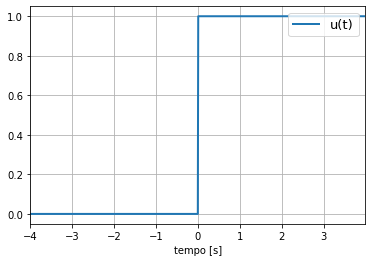

In [8]:
# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, f, intervalo, 'u(t)')

#### Domínio de Laplace

In [9]:
# calcula a transformada de Laplace de u(t)
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

In [10]:
f = sp.Heaviside(t-2) # função degrau unitário em t=2

symdisp('f(t) =', f)

<IPython.core.display.Math object>

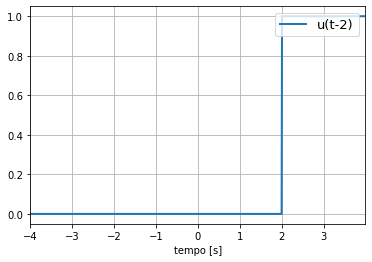

In [11]:
# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, f, intervalo, 'u(t-2)')

In [12]:
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

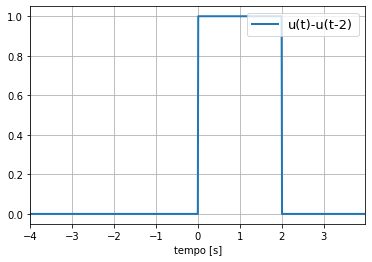

In [13]:
u1 = sp.Heaviside(t)   # função degrau unitário em t=0
u2 = sp.Heaviside(t-2) # função degrau unitário em t=2

# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, u1-u2, intervalo, 'u(t)-u(t-2)')

In [14]:
G = L(u1-u2,t,s)

symdisp('G(s) =', G)

<IPython.core.display.Math object>

## Função impulso unitário

#### Domínio do tempo

In [15]:
f = sp.DiracDelta(t)

symdisp('f(t) =', f)

<IPython.core.display.Math object>

#### Domínio de Laplace

In [16]:
# calcula a transformada de Laplace de δ(t)
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

## Função exponencial

#### Domínio do tempo

In [17]:
f = sp.exp(-a*t)

symdisp('f(t) =', f)

<IPython.core.display.Math object>

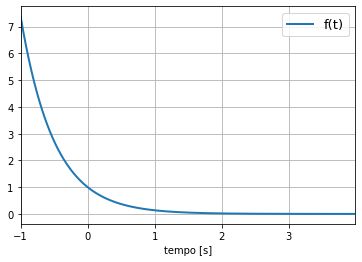

In [18]:
# plota função no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, f.subs({a:2}), intervalo, 'f(t)')

#### Domínio de Laplace

In [19]:
# calcula a transformada de Laplace de f(t)
F = L(f,t,s)

symdisp('F(s) =', F)

<IPython.core.display.Math object>

## Função cosseno amortecido

#### Domínio do tempo

In [20]:
g = sp.exp(-a*t)*sp.cos(omega*t)

symdisp('g(t) =', g)

<IPython.core.display.Math object>

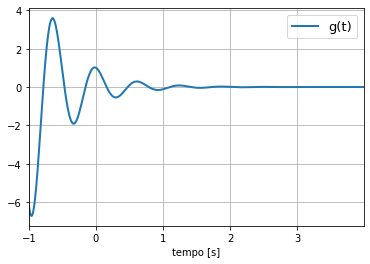

In [21]:
# plota função no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, g.subs({a:2, omega:10}), intervalo, 'g(t)')

In [22]:
G = L(g,t,s)

symdisp('G(s) =', G)

<IPython.core.display.Math object>

## Resposta subamortecida de um circuito de segunda ordem

#### Domínio do tempo

In [23]:
B1, B2 = sp.symbols('B1, B2', real=True)

h = sp.exp(-a*t)*(B1*sp.cos(omega*t) + B2*sp.sin(omega*t))

symdisp('h(t) =', h)

<IPython.core.display.Math object>

#### Domínio de Laplace

In [24]:
H = L(h,t,s)

symdisp('H(s) =', H)

<IPython.core.display.Math object>

In [25]:
h1 = invL(H,s,t)

symdisp('h_1(t) =', h1)

<IPython.core.display.Math object>

## Gere sua tabela de transformadas

In [26]:
func = [1,
         t,
         sp.exp(-a*t),
         t*sp.exp(-a*t),
         t**2*sp.exp(-a*t),
         sp.sin(omega*t),
         sp.cos(omega*t),
         1 - sp.exp(-a*t),
         sp.exp(-a*t)*sp.sin(omega*t),
         sp.exp(-a*t)*sp.cos(omega*t),
         ]
func

symdisp('f(t) =', func)

<IPython.core.display.Math object>

In [27]:
Fs = [L(f,t,s) for f in func]

symdisp('F(s) =', Fs)

<IPython.core.display.Math object>

In [ ]:
F = sp.Function('f')(t)
F

In [ ]:
L(sp.diff(t**2*sp.exp(-a*t),t),t,s)